In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
sns.set(color_codes=True)
from WindPy import *
import pymysql
import time
import pandas as pd
import datetime 
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error
from sqlalchemy import create_engine
import sqlalchemy
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2020 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

In [4]:
licha = pd.read_excel('C:/Users/AXZQ/Desktop/lc.xlsx', index_col=0)
licha2=licha.interpolate()
licha3=licha2.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
#PPID3=PPID2.drop(columns=["PPI"])

In [6]:
licha3

,GZ_YTM10,GK_YTM10,GK_GZ,licha_SS,DR007,R007
指标名称,,,,,,
2014-12-15,3.7815,4.2619,0.4804,0.112720,3.5250,3.6842
2014-12-16,3.7522,4.2162,0.4640,0.110052,3.5104,3.6128
2014-12-17,3.7377,4.1821,0.4444,0.106262,3.8892,4.0317
2014-12-18,3.7614,4.1960,0.4346,0.103575,5.2811,5.6066
2014-12-19,3.7106,4.1620,0.4514,0.108457,5.9349,6.0761
...,...,...,...,...,...,...
2022-06-23,2.7803,2.9919,0.2116,0.070724,1.6135,1.7263
2022-06-24,2.7978,3.0059,0.2081,0.069231,1.7978,2.2478
2022-06-27,2.8329,3.0384,0.2055,0.067634,1.9536,2.3592


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26631 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21517 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 31216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 25351 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 26631 missing from cur

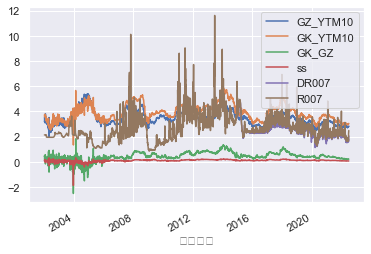

In [4]:
licha2.plot()

<ipython-input-5-46d0008ee900>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(licha2.GK_GZ,freq=365)


<Figure size 432x288 with 0 Axes>

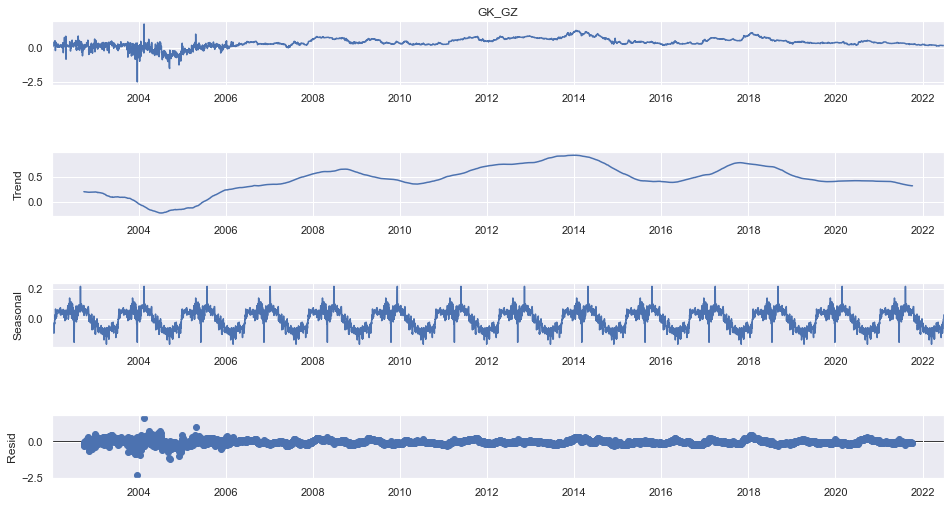

In [5]:
#趋势分解
#GK_GZ = pd.Series(GK_GZ).astype('float')
decomposition = seasonal_decompose(licha2.GK_GZ,freq=365)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)
#长期趋势
Trend = decomposition.trend
#季节性
Seasonal = decomposition.seasonal 
#残差
Residual = decomposition.resid

<ipython-input-6-86073abf4227>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition2 = seasonal_decompose(licha3.DR007,freq=365)


<Figure size 432x288 with 0 Axes>

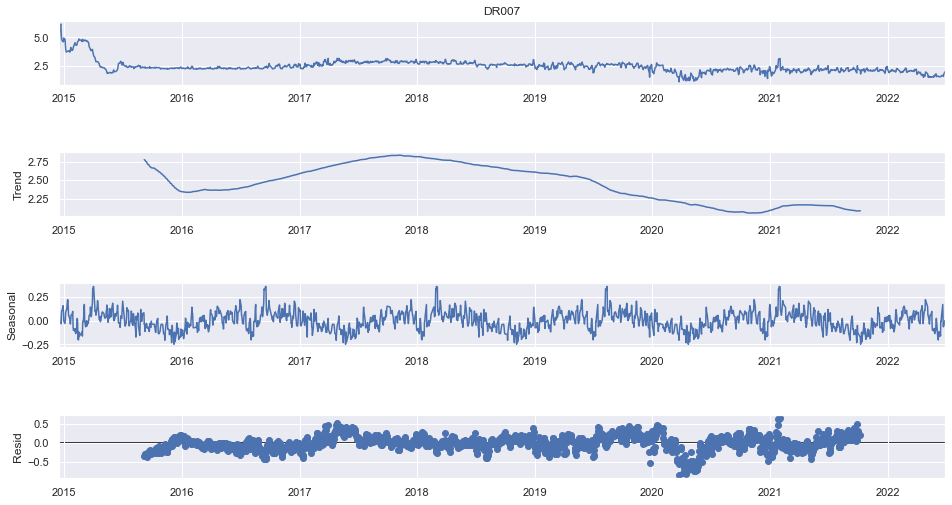

In [6]:
#趋势分解
#GK_GZ = pd.Series(GK_GZ).astype('float')
decomposition2 = seasonal_decompose(licha3.DR007,freq=365)  
fig = plt.figure()  
fig = decomposition2.plot()  
fig.set_size_inches(15, 8)
#长期趋势
Trend2 = decomposition2.trend
#季节性
Seasonal2 = decomposition2.seasonal 
#残差
Residual2 = decomposition2.resid

<ipython-input-9-152c8300b387>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition3 = seasonal_decompose(licha2.R007,freq=365)


<Figure size 432x288 with 0 Axes>

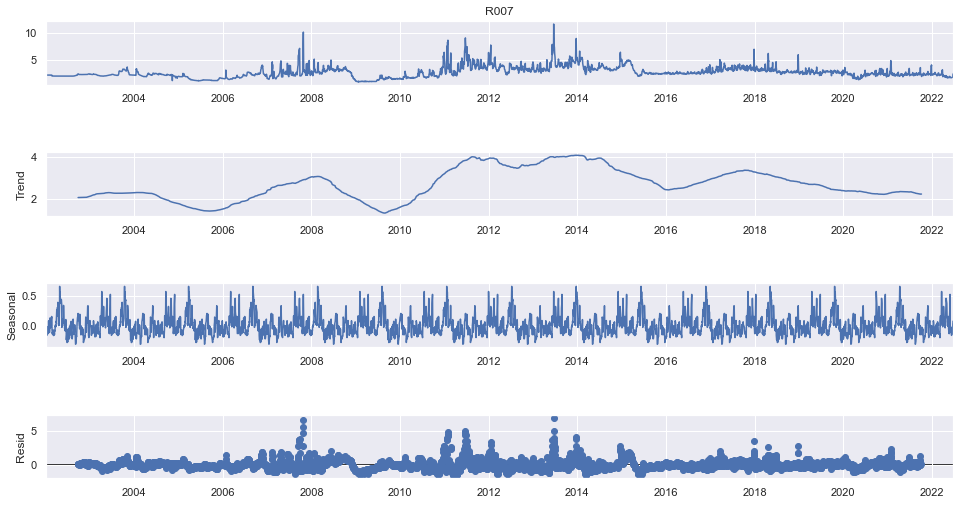

In [9]:
#趋势分解
#GK_GZ = pd.Series(GK_GZ).astype('float')
decomposition3 = seasonal_decompose(licha2.R007,freq=365)  
fig = plt.figure()  
fig = decomposition3.plot()  
fig.set_size_inches(15, 8)
#长期趋势
Trend3 = decomposition3.trend
#季节性
Seasonal3 = decomposition3.seasonal 
#残差
Residual3 = decomposition3.resid

In [10]:
#长期趋势
vol1=pd.DataFrame()

#vol1['vol1'] = vol.vol

vol1['Trend'] = decomposition.trend
#季节性
vol1['Seasonal'] = decomposition.seasonal 
#残差
vol1['Residual'] = decomposition.resid


vol1['Trend2'] = decomposition2.trend
#季节性
vol1['Seasonal2'] = decomposition2.seasonal 
#残差
vol1['Residual2'] = decomposition2.resid


vol1['Trend3'] = decomposition3.trend
#季节性
vol1['Seasonal3'] = decomposition3.seasonal 
#残差
vol1['Residual3'] = decomposition3.resid

address = "C:/Users/AXZQ/Desktop"
file_name = "/HP1.xlsx"
vol1.to_excel(address+ file_name, index = True)

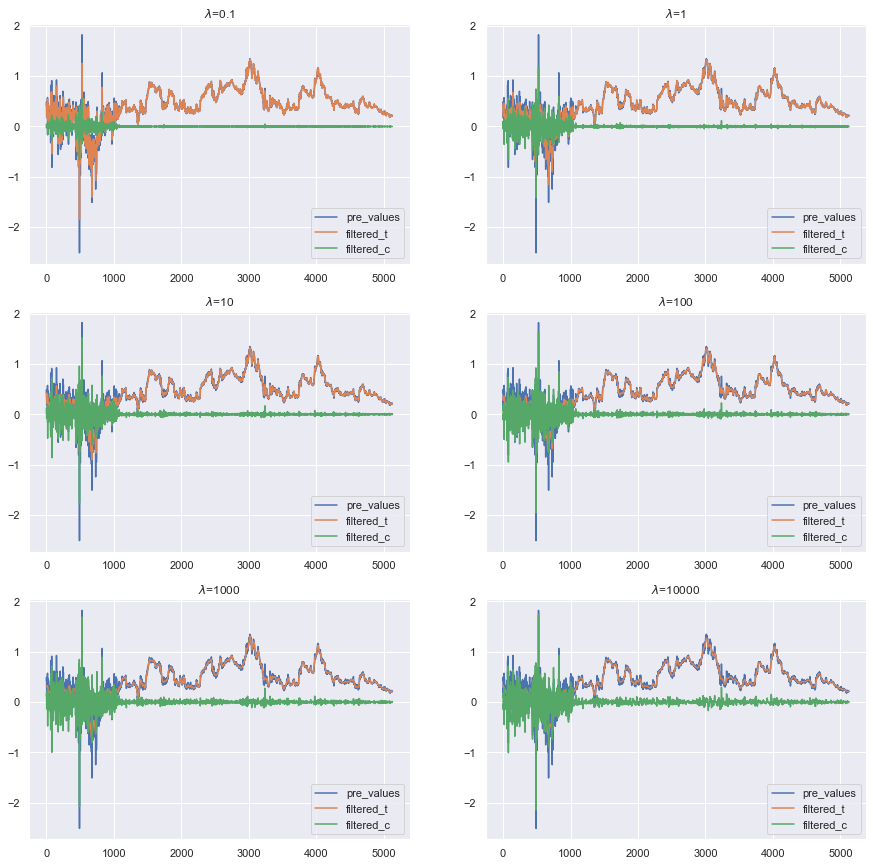

In [11]:
#HP滤波
from math import ceil

#licha3=licha2.drop(columns=["ss","GZ_YTM10","GK_YTM10"])

plt.close()

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def hp(y, lamb=10):
    def D_matrix(N):
        #(N-1,N) 元素全为0
        D = np.zeros((N-1,N))
        #后(N-1,N-1)对角线元素置1
        D[:,1:] = np.eye(N-1)
        #前(N-1,N-1)对角线元素置-1
        D[:,:-1] -= np.eye(N-1)
        """D1
        [[-1.  1.  0. ...  0.  0.  0.]
         [ 0. -1.  1. ...  0.  0.  0.]
         [ 0.  0. -1. ...  0.  0.  0.]
         ...
         [ 0.  0.  0. ...  1.  0.  0.]
         [ 0.  0.  0. ... -1.  1.  0.]
         [ 0.  0.  0. ...  0. -1.  1.]]
        """
        return D

    N = len(licha2.DR007.ravel())
    D1 = D_matrix(N)
    D2 = D_matrix(N-1)
    #@是矩阵乘法  D2.shape = (N-2,N-1) D1.shape = (N-1,N) 所以 D.shape = (N-2,N) 
    D = D2 @ D1
    # G = [i+λF]*-1Y
    #np.linalg.inv为矩阵求逆 套用公式 D.T@D = F F.shape=(N,N)
    t = np.linalg.inv((np.eye(N)+lamb*D.T@D))@ licha2.GK_GZ.ravel()
    return t

plt.figure(figsize=(15,15))

#尝试不同的λ
for i,l in enumerate([0.1,1,10,100,1000, 10000]):
    plt.subplot(3,2,i+1)
    t = hp(licha2.GK_GZ.ravel(),l)
    c = licha2.GK_GZ.ravel()-t
    plt.plot(licha2.GK_GZ.ravel(), label='pre_values')
    plt.plot(t, label='filtered_t')
    plt.plot(c, label='filtered_c')
    plt.legend()
    plt.title('$\lambda$='+str(l))

plt.show()

In [1]:
def D_matrix(N):
        #(N-1,N) 元素全为0
        D = np.zeros((N-1,N))
        #后(N-1,N-1)对角线元素置1
        D[:,1:] = np.eye(N-1)
        #前(N-1,N-1)对角线元素置-1
        D[:,:-1] -= np.eye(N-1)
        """D1
        [[-1.  1.  0. ...  0.  0.  0.]
         [ 0. -1.  1. ...  0.  0.  0.]
         [ 0.  0. -1. ...  0.  0.  0.]
         ...
         [ 0.  0.  0. ...  1.  0.  0.]
         [ 0.  0.  0. ... -1.  1.  0.]
         [ 0.  0.  0. ...  0. -1.  1.]]
        """
        return D
N = len(licha2.GK_GZ.ravel())
D1 = D_matrix(N)
D2 = D_matrix(N-1)
#@是矩阵乘法  D2.shape = (N-2,N-1) D1.shape = (N-1,N) 所以 D.shape = (N-2,N) 
D = D2 @ D1
lamb_1000_GK_GZ = np.linalg.inv((np.eye(N)+1000*D.T@D))@ licha2.GK_GZ.ravel()
lamb_10000_R007 = np.linalg.inv((np.eye(N)+10000*D.T@D))@ licha2.R007.ravel()
plt.figure(figsize=(12,12))
plt.plot(licha2.GK_GZ.ravel(), label='original')
plt.plot(lamb_1000_GK_GZ, label='lamb_1000_GK_GZ')
plt.plot(licha2.R007.ravel(), label='original')
plt.plot(lamb_10000_R007, label='lamb_10000_R007')
plt.legend()
plt.show()

NameError: name 'licha2' is not defined

In [17]:
licha2['lamb_1000_GK_GZ'] = lamb_1000_GK_GZ
licha2['lamb_10000_R007'] = lamb_10000_R007
address = "C:/Users/AXZQ/Desktop"
file_name = "/HP2.xlsx"
licha2.to_excel(address+ file_name, index = True)

In [7]:
def movstd(T, m):
    n = T.shape[0]
    
    cumsum = np.cumsum(T)
    cumsum_square = np.cumsum(T**2)
    
    #cumsum = np.insert(cumsum, 0, 0)               # 在数组开头插入一个0
    #cumsum_square = np.insert(cumsum_square, 0, 0) # 在数组开头插入一个0
    
    seg_sum = cumsum[m:] - cumsum[:-m]
    seg_sum_square = cumsum_square[m:] - cumsum_square[:-m]
    
    return np.sqrt( seg_sum_square/m - (seg_sum/m)**2 )

In [8]:
start_time = time.time()
stds_2 = movstd(licha3.R007, 5)
end_time = time.time()
print('Running time of movstd is {}s'.format((end_time - start_time)))

Running time of movstd is 0.06298422813415527s


In [15]:
licha3['R007_std']=licha3['R007'].rolling(5).std()
licha3['DR007_std']=licha3['DR007'].rolling(5).std()
licha3['GK_GZ_std']=licha3['GK_GZ'].rolling(5).std()

<ipython-input-15-3a6fba1fe2be>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  licha3['R007_std']=licha3['R007'].rolling(5).std()
<ipython-input-15-3a6fba1fe2be>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  licha3['DR007_std']=licha3['DR007'].rolling(5).std()
<ipython-input-15-3a6fba1fe2be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [18]:
licha3
address = "C:/Users/AXZQ/Desktop"
file_name = "/licha3.xlsx"
licha3.to_excel(address+ file_name, index = True)

In [19]:
licha3

,GZ_YTM10,GK_YTM10,GK_GZ,licha_SS,DR007,R007,R007_std,DR007_std,GK_GZ_std
指标名称,,,,,,,,,
2014-12-15,3.7815,4.2619,0.4804,0.112720,3.5250,3.6842,NaN,NaN,NaN
2014-12-16,3.7522,4.2162,0.4640,0.110052,3.5104,3.6128,NaN,NaN,NaN
2014-12-17,3.7377,4.1821,0.4444,0.106262,3.8892,4.0317,NaN,NaN,NaN
2014-12-18,3.7614,4.1960,0.4346,0.103575,5.2811,5.6066,NaN,NaN,NaN
2014-12-19,3.7106,4.1620,0.4514,0.108457,5.9349,6.0761,1.154156,1.112006,0.017802
...,...,...,...,...,...,...,...,...,...
2022-06-23,2.7803,2.9919,0.2116,0.070724,1.6135,1.7263,0.025752,0.038821,0.001337
2022-06-24,2.7978,3.0059,0.2081,0.069231,1.7978,2.2478,0.226523,0.065409,0.001577
2022-06-27,2.8329,3.0384,0.2055,0.067634,1.9536,2.3592,0.306020,0.130222,0.002403


In [ ]:
x = licha3[['BLACK','EXPER','HISP','MAR','SCHOOL','UNION']]
y = licha3[['LOGWAGE']]
x=sm.add_constant(x) #添加常数项
est=sm.OLS(y,x)
model=est.fit()#建立最小二乘回归模型
print(model.summary())